In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.model_selection import GridSearchCV

import comptools as comp

%matplotlib inline

/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load simulation data and pipeline
df_sim_train, df_sim_test = comp.load_sim(config='IC86.2012')
feature_list, feature_labels = comp.analysis.get_training_features()
pipeline = comp.get_pipeline('BDT')

Starting out with 108522 sim events
sim quality cut event flow:
      passed_IceTopQualityCuts:    1.0    1.0
FractionContainment_Laputop_InIce:  0.793  0.793
       passed_InIceQualityCuts:  0.795   0.76
                 num_hits_1_60:  0.997  0.759
             reco_energy_range:  0.874  0.662




In [3]:
pipeline.get_params().keys()

['classifier__min_impurity_split',
 'classifier__max_features',
 'classifier__subsample',
 'classifier__max_depth',
 'classifier__min_samples_split',
 'classifier__learning_rate',
 'classifier__min_samples_leaf',
 'classifier__criterion',
 'classifier__loss',
 'classifier__n_estimators',
 'classifier__max_leaf_nodes',
 'steps',
 'classifier__warm_start',
 'classifier__verbose',
 'classifier__presort',
 'classifier__min_weight_fraction_leaf',
 'classifier',
 'classifier__random_state',
 'classifier__init']

In [4]:
parameters = {'classifier__max_depth': range(1, 13), 
              'classifier__n_estimators':[5, 10, 20, 50, 100, 200, 300, 400, 500, 600]}

# parameters = {'classifier__max_depth': range(1, 8), 
#               'classifier__n_estimators':[5, 10, 20, 50, 100, 200, 300, 400, 500, 600]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=25, verbose=2)
grid_search.fit(df_sim_train[feature_list], df_sim_train['target'])

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=5, classifier__max_depth=1 .............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV] classifier__n_estimators=10, classifier__max_depth=1 ............
[CV]  classifier__n_estimators=5, classifier__max_depth=1, total=   0.1s
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=20, classifier__max_depth=1 ............
[CV] classifier__n_estimators=50, classifier__max_depth=1 ............
[CV] classifier__n_estimators=50, classifier__max_depth=1 ............
[CV] classifier__n_estimators=50, classifier__max_depth=1 ............
[CV] classif

[CV]  classifier__n_estimators=400, classifier__max_depth=1, total=   7.3s
[CV] classifier__n_estimators=50, classifier__max_depth=3 ............
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   5.7s
[CV] classifier__n_estimators=50, classifier__max_depth=3 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=3, total=   0.9s
[CV] classifier__n_estimators=50, classifier__max_depth=3 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=3, total=   0.9s
[CV] classifier__n_estimators=100, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=200, classifier__max_depth=2, total=   5.7s
[CV] classifier__n_estimators=100, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=20, classifier__max_depth=3, total=   0.8s
[CV] classifier__n_estimators=100, classifier__max_depth=3 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=1, total=   7.9s
[CV] classifier__n_estimators=200, classifier__max_d

[CV] classifier__n_estimators=10, classifier__max_depth=5 ............
[CV]  classifier__n_estimators=10, classifier__max_depth=5, total=   0.6s
[CV]  classifier__n_estimators=10, classifier__max_depth=5, total=   0.8s
[CV] classifier__n_estimators=20, classifier__max_depth=5 ............
[CV] classifier__n_estimators=20, classifier__max_depth=5 ............
[CV]  classifier__n_estimators=400, classifier__max_depth=3, total=  15.1s
[CV] classifier__n_estimators=20, classifier__max_depth=5 ............
[CV]  classifier__n_estimators=10, classifier__max_depth=5, total=   0.8s
[CV] classifier__n_estimators=50, classifier__max_depth=5 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=5, total=   1.2s
[CV] classifier__n_estimators=50, classifier__max_depth=5 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=5, total=   1.4s
[CV] classifier__n_estimators=50, classifier__max_depth=5 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=5

[Parallel(n_jobs=25)]: Done 112 tasks      | elapsed:   29.4s


[CV]  classifier__n_estimators=500, classifier__max_depth=3, total=  18.4s
[CV] classifier__n_estimators=300, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=5, total=   4.0s
[CV] classifier__n_estimators=300, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=3, total=  19.6s
[CV] classifier__n_estimators=300, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=3, total=  20.0s
[CV] classifier__n_estimators=400, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=5, total=   5.9s
[CV] classifier__n_estimators=400, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=300, classifier__max_depth=4, total=  14.4s
[CV] classifier__n_estimators=400, classifier__max_depth=5 ...........
[CV]  classifier__n_estimators=100, classifier__max_depth=5, total=   6.4s
[CV] classifier__n_estimators=500, classifier__max

[CV] classifier__n_estimators=100, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=20, classifier__max_depth=7, total=   3.2s
[CV] classifier__n_estimators=200, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=7, total=   4.8s
[CV] classifier__n_estimators=200, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=5, total=  29.7s
[CV] classifier__n_estimators=200, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=300, classifier__max_depth=6, total=  18.5s
[CV] classifier__n_estimators=300, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=7, total=   4.3s
[CV] classifier__n_estimators=300, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=300, classifier__max_depth=6, total=  21.2s
[CV] classifier__n_estimators=300, classifier__max_depth=7 ...........
[CV]  classifier__n_estimators=300, classifier__max_dept

[CV]  classifier__n_estimators=20, classifier__max_depth=9, total=   3.5s
[CV] classifier__n_estimators=50, classifier__max_depth=9 ............
[CV]  classifier__n_estimators=20, classifier__max_depth=9, total=   3.8s
[CV] classifier__n_estimators=100, classifier__max_depth=9 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=9, total=   6.6s
[CV] classifier__n_estimators=100, classifier__max_depth=9 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=8, total=  30.2s
[CV] classifier__n_estimators=100, classifier__max_depth=9 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=8, total=  32.8s
[CV] classifier__n_estimators=200, classifier__max_depth=9 ...........
[CV]  classifier__n_estimators=50, classifier__max_depth=9, total=   7.2s
[CV] classifier__n_estimators=200, classifier__max_depth=9 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=8, total=  32.0s
[CV] classifier__n_estimators=200, classifier__max_de

[CV] classifier__n_estimators=20, classifier__max_depth=11 ...........
[CV]  classifier__n_estimators=400, classifier__max_depth=9, total= 1.6min
[CV] classifier__n_estimators=20, classifier__max_depth=11 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=9, total= 1.6min
[CV] classifier__n_estimators=50, classifier__max_depth=11 ...........
[CV]  classifier__n_estimators=10, classifier__max_depth=11, total=  14.2s
[CV] classifier__n_estimators=50, classifier__max_depth=11 ...........
[CV]  classifier__n_estimators=500, classifier__max_depth=9, total= 1.7min
[CV] classifier__n_estimators=50, classifier__max_depth=11 ...........
[CV]  classifier__n_estimators=20, classifier__max_depth=11, total=  13.9s
[CV] classifier__n_estimators=100, classifier__max_depth=11 ..........
[CV]  classifier__n_estimators=10, classifier__max_depth=11, total=  24.9s
[CV] classifier__n_estimators=100, classifier__max_depth=11 ..........
[CV]  classifier__n_estimators=10, classifier__max_de

[CV]  classifier__n_estimators=600, classifier__max_depth=11, total= 3.3min
[CV]  classifier__n_estimators=200, classifier__max_depth=12, total= 1.8min
[CV]  classifier__n_estimators=300, classifier__max_depth=12, total= 1.6min
[CV]  classifier__n_estimators=300, classifier__max_depth=12, total= 2.1min
[CV]  classifier__n_estimators=300, classifier__max_depth=12, total= 2.2min
[CV]  classifier__n_estimators=200, classifier__max_depth=12, total= 2.7min
[CV]  classifier__n_estimators=500, classifier__max_depth=11, total= 4.2min
[CV]  classifier__n_estimators=600, classifier__max_depth=11, total= 4.0min
[CV]  classifier__n_estimators=400, classifier__max_depth=12, total= 2.6min
[CV]  classifier__n_estimators=600, classifier__max_depth=11, total= 4.2min
[CV]  classifier__n_estimators=500, classifier__max_depth=12, total= 2.5min
[CV]  classifier__n_estimators=400, classifier__max_depth=12, total= 2.9min
[CV]  classifier__n_estimators=400, classifier__max_depth=12, total= 3.0min
[CV]  classi

[Parallel(n_jobs=25)]: Done 360 out of 360 | elapsed: 10.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=2,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=25,
       param_grid={'classifier__n_estimators': [5, 10, 20, 50, 100, 200, 300, 400, 500, 600], 'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [5]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [6]:
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__max_depth,param_classifier__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.118298,0.004303,0.621936,0.622572,1,5,"{u'classifier__n_estimators': 5, u'classifier_...",120,0.619156,0.622730,0.626230,0.621101,0.620422,0.623885,0.008991,0.000268,0.003080,0.001142
1,0.209823,0.005407,0.626528,0.627731,1,10,"{u'classifier__n_estimators': 10, u'classifier...",119,0.624225,0.627680,0.630703,0.626260,0.624657,0.629253,0.012143,0.000621,0.002957,0.001222
2,0.424922,0.007739,0.635892,0.636956,1,20,"{u'classifier__n_estimators': 20, u'classifier...",118,0.638717,0.640802,0.640365,0.635594,0.628594,0.634471,0.000649,0.000024,0.005204,0.002758
3,1.067445,0.013794,0.663009,0.664798,1,50,"{u'classifier__n_estimators': 50, u'classifier...",115,0.661081,0.667790,0.669768,0.662492,0.658177,0.664112,0.111730,0.000493,0.004924,0.002217
4,2.326791,0.022548,0.704499,0.709042,1,100,"{u'classifier__n_estimators': 100, u'classifie...",114,0.705689,0.722810,0.707819,0.701944,0.699988,0.702371,0.253693,0.004860,0.003306,0.009737
5,3.973685,0.031561,0.738932,0.742570,1,200,"{u'classifier__n_estimators': 200, u'classifie...",103,0.730081,0.744759,0.743246,0.741367,0.743469,0.741583,0.284156,0.004619,0.006259,0.001550
6,5.449798,0.040117,0.743345,0.747987,1,300,"{u'classifier__n_estimators': 300, u'classifie...",91,0.737297,0.750842,0.746586,0.746198,0.746153,0.746921,0.335789,0.007071,0.004280,0.002040
7,6.460932,0.058052,0.745532,0.750343,1,400,"{u'classifier__n_estimators': 400, u'classifie...",75,0.738430,0.753497,0.749090,0.748613,0.749076,0.748919,0.605641,0.008938,0.005022,0.002233
8,8.501271,0.070710,0.747440,0.752172,1,500,"{u'classifier__n_estimators': 500, u'classifie...",62,0.741770,0.755823,0.750581,0.750283,0.749970,0.750410,0.554548,0.011263,0.004017,0.002582
9,11.071048,0.099507,0.747520,0.753226,1,600,"{u'classifier__n_estimators': 600, u'classifie...",61,0.740995,0.756359,0.750820,0.751566,0.750746,0.751752,1.011859,0.006467,0.004614,0.002217


In [7]:
pivot_test_score = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_test_score")
pivot_test_score

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.621936,0.626528,0.635892,0.663009,0.704499,0.738932,0.743345,0.745532,0.747440,0.747520
2,0.645295,0.660245,0.720880,0.744438,0.749031,0.751615,0.752987,0.752550,0.752550,0.752609
3,0.708912,0.720264,0.737103,0.747997,0.751874,0.752868,0.752788,0.752251,0.752530,0.752410
4,0.725254,0.737421,0.746427,0.750363,0.752371,0.752152,0.752609,0.752888,0.751913,0.751416
5,0.729210,0.741834,0.749011,0.752410,0.752987,0.753067,0.752172,0.751794,0.751416,0.750224
6,0.740065,0.747858,0.751257,0.753524,0.754418,0.753305,0.751933,0.750880,0.750442,0.748812
7,0.743782,0.748753,0.751615,0.753206,0.753285,0.752550,0.750979,0.749727,0.747937,0.746188
8,0.744538,0.747202,0.750025,0.751556,0.751894,0.750880,0.748852,0.747381,0.746287,0.745413
9,0.744379,0.748931,0.750701,0.751079,0.751715,0.748872,0.746983,0.745492,0.744558,0.743504


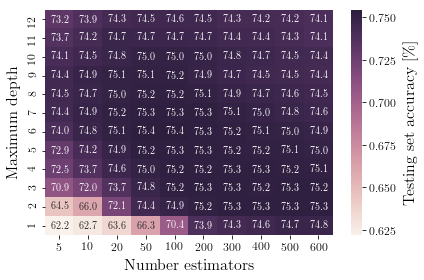

In [22]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_score, annot=True, fmt='0.1%', ax=ax,
            cbar_kws={"label": "Testing set accuracy [\%]"}, robust=False, square=False)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
    
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap.png')
plt.savefig(outfile)
plt.show()

In [9]:
pivot_train_score = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_train_score")
pivot_train_score

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.622572,0.627731,0.636956,0.664798,0.709042,0.742570,0.747987,0.750343,0.752172,0.753226
2,0.645136,0.663575,0.727123,0.749756,0.754299,0.757251,0.758961,0.760184,0.761555,0.762351
3,0.712302,0.726526,0.744637,0.755502,0.758474,0.761953,0.764697,0.767341,0.770601,0.773076
4,0.732619,0.745224,0.753931,0.759935,0.763653,0.768852,0.773812,0.778752,0.784100,0.788881
5,0.738872,0.751059,0.758166,0.764259,0.769021,0.777042,0.786495,0.794269,0.802628,0.810421
6,0.750780,0.758901,0.764259,0.772182,0.779040,0.792360,0.805431,0.817787,0.829258,0.840222
7,0.761754,0.767321,0.774140,0.784040,0.792469,0.811376,0.829377,0.845848,0.860917,0.875022
8,0.775154,0.780541,0.788225,0.800431,0.812459,0.836614,0.859198,0.880261,0.899187,0.914803
9,0.789994,0.798095,0.808264,0.822787,0.838303,0.868164,0.894644,0.916244,0.934902,0.949434


In [10]:
overfitting_pivot = (pivot_train_score - pivot_test_score)/pivot_test_score * 100
overfitting_pivot

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.102287,0.191970,0.167271,0.269871,0.644835,0.492350,0.624487,0.645322,0.633036,0.763284
2,-0.024640,0.504358,0.865959,0.714363,0.703352,0.749866,0.793382,1.014425,1.196706,1.294346
3,0.478142,0.869456,1.022195,1.003327,0.877845,1.206763,1.581896,2.005870,2.401398,2.746587
4,1.015578,1.058154,1.005441,1.275705,1.499543,2.220229,2.817184,3.435352,4.280583,4.985850
5,1.324992,1.243475,1.222268,1.574769,2.129325,3.183743,4.563242,5.649730,6.815359,8.023955
6,1.447921,1.476691,1.730668,2.476066,3.263683,5.184476,7.114725,8.910516,10.502548,12.207301
7,2.416279,2.479889,2.996804,4.093757,5.201765,7.816879,10.439450,12.820862,15.105532,17.265689
8,4.112051,4.461890,5.093177,6.503285,8.055053,11.417794,14.735325,17.779441,20.488035,22.724374
9,6.127984,6.564559,7.667966,9.547382,11.518833,15.929549,19.767667,22.904619,25.564733,27.697273


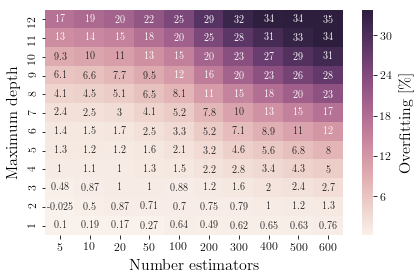

In [11]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(overfitting_pivot, annot=True, ax=ax,
            cbar_kws={"label": "Overfitting [\%]"}, robust=True, square=False)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
    
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap-overfitting.png')
plt.savefig(outfile)
plt.show()

In [12]:
pivot_test_std = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "std_test_score")
pivot_test_std

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.003080,0.002957,0.005204,0.004924,0.003306,0.006259,0.004280,0.005022,0.004017,0.004614
2,0.007733,0.003407,0.007057,0.005313,0.004291,0.002913,0.002618,0.002436,0.002353,0.002038
3,0.004986,0.002586,0.007470,0.003504,0.002548,0.002706,0.002565,0.002610,0.002762,0.002027
4,0.011769,0.003538,0.003391,0.001756,0.001328,0.001456,0.003042,0.002577,0.001845,0.001886
5,0.006042,0.002131,0.002888,0.001795,0.001554,0.000991,0.001202,0.000940,0.000922,0.001764
6,0.004355,0.002230,0.002214,0.001925,0.001274,0.001820,0.002052,0.002435,0.002772,0.003493
7,0.001719,0.002157,0.002644,0.003150,0.002865,0.003381,0.003054,0.003357,0.003332,0.003085
8,0.003270,0.003145,0.002889,0.002282,0.002188,0.003019,0.003103,0.003252,0.003876,0.004206
9,0.003926,0.003254,0.002635,0.002607,0.002639,0.002282,0.003145,0.002548,0.004093,0.004136


In [13]:
# # Draw a heatmap with the numeric values in each cell
# fig, ax = plt.subplots()
# sns.heatmap(pivot_test_std, annot=True, fmt='0.3f', linewidths=.5, cmap='Blues', ax=ax,
#             cbar_kws={"label": "Std"}, robust=True, square=True)
# ax.set_xlabel('Number estimators')
# ax.set_ylabel('Maximum depth')
# plt.show()

In [14]:
pivot_test_rank = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "rank_test_score")
pivot_test_rank

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,120,119,118,115,114,103,91,75,62,61
2,117,116,111,85,49,30,7,14,14,12
3,113,112,106,56,27,10,11,21,17,18
4,110,105,71,42,20,23,12,9,25,33
5,109,97,50,18,7,6,22,28,33,43
6,102,59,35,2,1,3,24,38,41,54
7,88,55,30,5,4,14,37,48,57,73
8,82,64,45,32,26,38,53,63,72,78
9,86,51,40,36,29,52,67,76,81,90


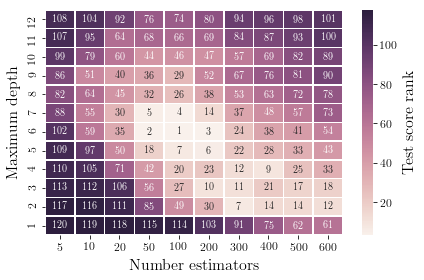

In [18]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_test_rank, annot=True, fmt='d', linewidths=.5, ax=ax,
            cbar_kws={"label": "Test score rank"}, robust=True, square=False)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
ax.invert_yaxis()

outfile = os.path.join(comp.paths.figures_dir, 'model_evaluation',
                       'grid-search-max_depth-n_estimators-heatmap-test-rank.png')
plt.savefig(outfile)
plt.show()

In [16]:
pivot_fit_time = cv_results.pivot("param_classifier__max_depth", "param_classifier__n_estimators", "mean_fit_time")
pivot_fit_time

param_classifier__n_estimators,5,10,20,50,100,200,300,400,500,600
param_classifier__max_depth,,,,,,,,,,
1,0.118298,0.209823,0.424922,1.067445,2.326791,3.973685,5.449798,6.460932,8.501271,11.071048
2,0.226728,0.394157,0.777675,1.811893,3.038147,6.127894,8.540042,11.151531,13.852913,16.218600
3,0.209464,0.420541,0.861163,2.001204,3.800102,8.846494,12.297432,14.067836,19.236447,24.484771
4,0.336374,0.604984,1.235185,3.104119,5.119169,9.678869,15.730774,18.360161,23.640411,27.256437
5,0.404802,0.706598,1.183219,3.298988,6.213872,11.399018,17.786696,24.940043,54.227860,59.289663
6,0.491018,1.063702,1.855955,4.426094,8.132892,16.700048,20.557351,67.781456,83.113592,91.269366
7,0.698670,1.219647,2.862616,11.854092,34.097424,12.419558,19.483242,24.667472,71.512716,36.189908
8,4.632594,1.209142,2.245910,4.815686,32.550906,51.969422,22.415552,31.409309,46.906632,71.876275
9,0.840302,1.667498,3.427363,8.029299,15.329603,32.917098,50.195497,85.439795,96.674725,113.502156


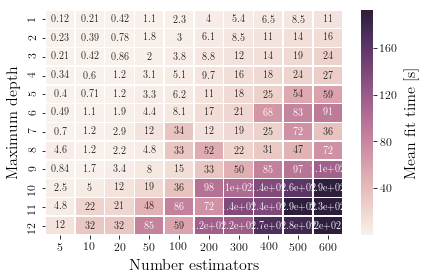

In [19]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(pivot_fit_time, annot=True, linewidths=.5, ax=ax,
            cbar_kws={"label": "Mean fit time [s]"}, robust=True, square=False)
ax.set_xlabel('Number estimators')
ax.set_ylabel('Maximum depth')
plt.show()